**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd #for analysis and manipulation of numerical tables
import matplotlib.pyplot as plt
%matplotlib inline

**Load the data**

In [2]:
stock_data = pd.read_csv('stock.csv')
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
stock_data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
df=stock_data.reset_index()
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
print(stock_data.isnull().sum())

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


In [6]:
stock_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
stock_data1 = stock_data.reset_index()

In [8]:
stock_data1.shape

(2035, 9)

**Plot the dataframe**

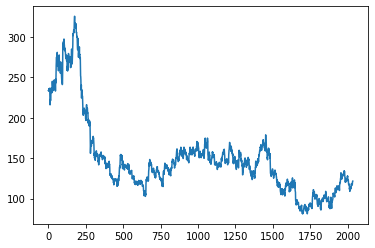

In [9]:
stock_data1 = df['Close']
plt.plot(stock_data1)

**Transform the data using MinMax Scaler**

In [10]:
#We have to do this as LSTM is sensitive to the scale of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
stock_data1 = scaler.fit_transform(np.array(stock_data1).reshape(-1,1))

In [11]:
stock_data1 #array has been transformed into values ranging from 0 to 1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

**Split dataset into training and testing datasets**

In [12]:
train_size = int(len(stock_data1)*0.65)
test_size = len(stock_data1) - train_size
train_data, test_data = stock_data1[0:train_size,:],stock_data1[train_size:len(stock_data1),:1]

**Preprocess the data**

In [13]:
def create_dataset(dataset, time_step=1):
  x, y = [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    x.append(a)
    y.append(dataset[i+time_step,0])
  return np.array(x),np.array(y)

In [14]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [15]:
#reshaping input for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [16]:
x_train.shape

(1221, 100, 1)

In [17]:
y_train.shape

(1221,)

**Importing required modules for the stacked LSTM**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
#adding layers
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**Fit the model**

In [21]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 13s 249ms/step - loss: 0.0233 - val_loss: 0.0052
Epoch 2/100
20/20 [==============================] - 3s 170ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 3/100
20/20 [==============================] - 3s 162ms/step - loss: 0.0018 - val_loss: 8.1128e-04
Epoch 4/100
20/20 [==============================] - 3s 163ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/100
20/20 [==============================] - 3s 163ms/step - loss: 0.0014 - val_loss: 8.7720e-04
Epoch 6/100
20/20 [==============================] - 3s 163ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/100
20/20 [==============================] - 3s 174ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 3s 162ms/step - loss: 0.0014 - val_loss: 8.2050e-04
Epoch 9/100
20/20 [==============================] - 3s 167ms/step - loss: 0.0013 - val_loss: 8.9583e-04
Epoch 10/100
20/20 [==============================] - 3s 165ms/step - loss

**Generate Predictions**

In [22]:
import tensorflow as tf #importing the tensorflow library to predict
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

**Transform back to original form using reverse scaling**

In [23]:
train_prediction = scaler.inverse_transform(train_prediction)
test_prediction = scaler.inverse_transform(test_prediction)

**Calculate RMSE (Root Mean Square Error)**

In [24]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_prediction)) #for training data

170.18087131965842

**Test Data RMSE**

In [25]:
math.sqrt(mean_squared_error(y_test,test_prediction)) #for testing data

118.54432351586856

**Shifting train predictions for plotting**

In [26]:
look_back=100
trainPredictionPlot = np.empty_like(stock_data1) 
trainPredictionPlot[:, :] = np.nan
trainPredictionPlot[look_back:len(train_prediction)+look_back, :] = train_prediction

**Shifting test predictions for plotting**

In [27]:
testPredictionPlot = np.empty_like(stock_data1)
testPredictionPlot[:, :] = np.nan
testPredictionPlot[len(train_prediction)+(look_back*2)+1:len(stock_data1)-1, :] = test_prediction

**Plotting**

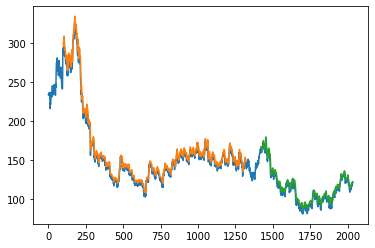

In [28]:
plt.plot(scaler.inverse_transform(stock_data1))
plt.plot(trainPredictionPlot)
plt.plot(testPredictionPlot)
plt.show()

In [29]:
len(test_data)

713

In [30]:
len(test_data), x_test.shape

(713, (612, 100, 1))

In [31]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

**Prediction for next 30 days**

In [33]:
from numpy import array

final_output=[]
n_steps=100
i=1
while(i<=30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        ypred = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,ypred))
        temp_input.extend(ypred[0].tolist())
        temp_input=temp_input[1:]
        final_output.extend(ypred.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        ypred = model.predict(x_input, verbose=0)
        print(ypred[0])
        temp_input.extend(ypred[0].tolist())
        print(len(temp_input))
        final_output.extend(ypred.tolist())
        i=i+1
    

print(final_output)

[0.17623281]
101
2 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

10 day output [[0.23391055]]
11 day input [0.11846405 0.14644608 0.14808007 0.15910948 0.15992647 0.15788399
 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908 0.18974673
 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458
 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444
 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268
 0.21568627 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817
 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013
 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458
 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072
 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288
 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634
 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451
 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673
 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.1540032

19 day output [[0.29018393]]
20 day input [0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353
 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405
 0.1621732  0.16319444 0.16584967 0.17623281 0.18178326 0.18825135
 0.19497173 0.2016800

28 day output [[0.3506978]]
29 day input [0.17851307 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444
 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268
 0.21568627 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817
 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013
 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458
 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072
 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288
 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634
 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451
 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673
 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967
 0.17623281 0.18178326 0.18825135 0.19497173 0.20168009 0.20830329
 0.21482913 0.22126299 0.22761774 0.23391055 0.24015996 0.24638352
 0.2525962  0.25881013

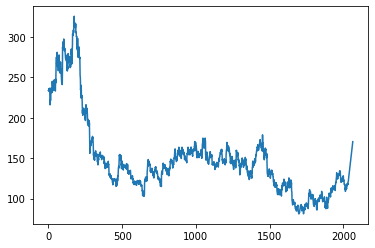

In [34]:
stock_data = stock_data1.tolist()
stock_data.extend(final_output)
stock_data = scaler.inverse_transform(stock_data).tolist()
plt.plot(stock_data)